# 광주 인공지능 사관학교
- - -
- 작성자 : 2반 한지호
- 작성일 : 20.07.15 수
- 2교시 파이썬 빅데이터 시간에 진행한 Pandas 실습

### Pandas의 통계 메서드

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

#### 데이터 프레임을 읽어 온다:

In [3]:
os.chdir(r'.\data')

In [4]:
# df = pd.read_csv('data_studentlist_en.csv', header='infer',encoding='ISO-8859-1')
df0 = pd.read_csv('data_iris.csv', header='infer',encoding = 'latin1')

In [5]:
df0.shape

(150, 5)

#### 데이터 프레임의 구조를 한눈에 살펴 본다:

In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### 데이터 프레임의 상단과 하단:

In [7]:
df0.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [8]:
df0.tail(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


#### 데이터 프레임의 컬럼 이름을 header에 저장한다:

In [9]:
header = df0.columns
header

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

#### 마지막 컬럼 'Species'과 이외의 Feature를 분리해서 저장해 둔다:

In [10]:
df = df0.drop(columns = 'Species')
Y = df0.loc[:,'Species']

#### 여러 통계 메서드를 적용해 본다:

In [11]:
df.sum(axis=0)

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

In [12]:
df.mean(axis=0)

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [13]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.loc[:,'Sepal.Length'].corr(df.loc[:,'Sepal.Width'])

-0.11756978413300208

In [15]:
df.loc[:,'Sepal.Length'].corr(df.loc[:,'Petal.Length'])

0.8717537758865831

In [16]:
np.round(df.corr(),3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000,-0.118,0.872,0.818
Sepal.Width,-0.118,1.000,-0.428,-0.366
Petal.Length,0.872,-0.428,1.000,0.963
Petal.Width,0.818,-0.366,0.963,1.000


In [17]:
df.corrwith(df.loc[:,'Petal.Length'])

Sepal.Length    0.871754
Sepal.Width    -0.428440
Petal.Length    1.000000
Petal.Width     0.962865
dtype: float64

#### 조건부 슬라이싱 후 통계함수를 적용해 본다:

In [18]:
df0[df0.Species=='setosa'].mean(axis=0)

Sepal.Length    5.006
Sepal.Width     3.428
Petal.Length    1.462
Petal.Width     0.246
dtype: float64

In [19]:
df0[df0.Species=='virginica'].mean(axis=0)

Sepal.Length    6.588
Sepal.Width     2.974
Petal.Length    5.552
Petal.Width     2.026
dtype: float64

In [20]:
df0[df0.Species=='versicolor'].mean(axis=0)

Sepal.Length    5.936
Sepal.Width     2.770
Petal.Length    4.260
Petal.Width     1.326
dtype: float64

In [21]:
#dict(Counter(Y))
dict(Y.value_counts())

{'versicolor': 50, 'setosa': 50, 'virginica': 50}

### Pandas의 켤측치 처리 기능

#### 결측치를 임의로 넣어 본다:

In [22]:
df.iloc[10,0] = np.nan
df.iloc[32,2] = np.nan
df.iloc[17,2] = np.nan
df.iloc[129,2] = np.nan

In [23]:
df.count(axis=0)

Sepal.Length    149
Sepal.Width     150
Petal.Length    147
Petal.Width     150
dtype: int64

#### 여러 통계치를 다시 계산해 본다:

In [24]:
df.sum(axis=0)

Sepal.Length    871.1
Sepal.Width     458.6
Petal.Length    555.0
Petal.Width     179.9
dtype: float64

In [25]:
df.sum(axis=0, skipna=False)

Sepal.Length      NaN
Sepal.Width     458.6
Petal.Length      NaN
Petal.Width     179.9
dtype: float64

In [26]:
df.mean(axis=0)

Sepal.Length    5.846309
Sepal.Width     3.057333
Petal.Length    3.775510
Petal.Width     1.199333
dtype: float64

In [27]:
df.mean(axis=0, skipna=False)

Sepal.Length         NaN
Sepal.Width     3.057333
Petal.Length         NaN
Petal.Width     1.199333
dtype: float64

#### 결측치 관련 메소드를 적용해 본다:

In [28]:
(df.isnull()).sum(axis=0)
#df.isnull()

Sepal.Length    1
Sepal.Width     0
Petal.Length    3
Petal.Width     0
dtype: int64

In [29]:
(df.isnull()).mean(axis=0)

Sepal.Length    0.006667
Sepal.Width     0.000000
Petal.Length    0.020000
Petal.Width     0.000000
dtype: float64

In [30]:
# 결측치 있는 행 제거.
df2 = df.dropna(axis=0)

In [31]:
df2.shape

(146, 4)

In [32]:
df2.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [33]:
# 결측치 있는 행 제거. 
# 최소 3개 이상 정상값이 있는 행은 제외.
df2 = df.dropna(axis=0, thresh = 3)
df2.shape

(150, 4)

In [34]:
# 결측치 있는 열 제거. 
df3 = df.dropna(axis=1)

In [35]:
df3.shape

(150, 2)

In [36]:
df3.head(3)

,Sepal.Width,Petal.Width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2


In [37]:
# 결측치 있는 열 제거.
# 최소 148개 이상 정상값이 있는 열은 제외.
df3 = df.dropna(axis=1, thresh = 148)
df3.shape

(150, 3)

In [38]:
df3.head(3)

,Sepal.Length,Sepal.Width,Petal.Width
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2


In [39]:
# 결측치를 채워넣는다.
# 전체에 적용.
df4 = df.fillna(value=0)
df4.count()

Sepal.Length    150
Sepal.Width     150
Petal.Length    150
Petal.Width     150
dtype: int64

In [40]:
# 결측치를 채워넣는다.
# 개개 열에 적용.
df['Sepal.Length'] = df['Sepal.Length'].fillna(value=df['Sepal.Length'].mean())
df['Petal.Length'] = df['Petal.Length'].fillna(value=df['Petal.Length'].mean())
df.count()

Sepal.Length    150
Sepal.Width     150
Petal.Length    150
Petal.Width     150
dtype: int64

In [41]:
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


### Pandas의 시각화 기능

#### 산점도:

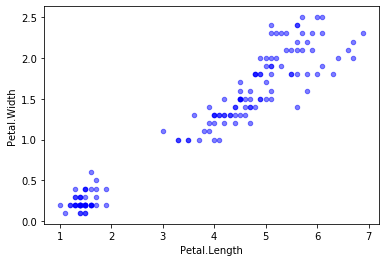

In [42]:
df0.plot.scatter(x='Petal.Length', y='Petal.Width',color='blue',alpha=0.5,marker='o',s=20)
plt.show()

#### 히스토 그램:

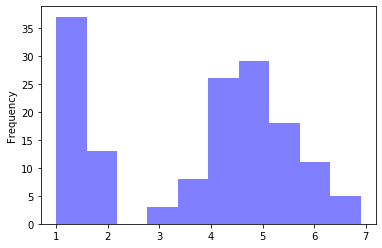

In [43]:
df0.loc[:,'Petal.Length'].plot.hist(color='blue',alpha=0.5)
plt.show()

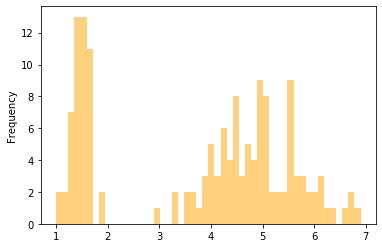

In [44]:
df0.loc[:,'Petal.Length'].plot.hist(bins=50,color='orange',alpha=0.5)
plt.show()

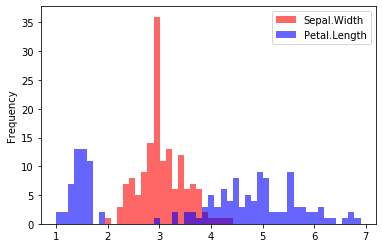

In [45]:
df0.loc[:,['Sepal.Width','Petal.Length']].plot.hist(bins=50,color=['red','blue'],alpha=0.6)
plt.show()

#### 막대 그림 (바차트):

In [46]:
#frequencies = dict(Counter(df0.Species))
#my_counts = list(frequencies.values())
#my_labels = list(frequencies.keys())
frequencies = df0.Species.value_counts()
my_counts = list(frequencies.values)
my_labels = list(frequencies.index)
df4 = pd.DataFrame( {'counts':my_counts}, index = my_labels)
df4

,counts
versicolor,50
setosa,50
virginica,50


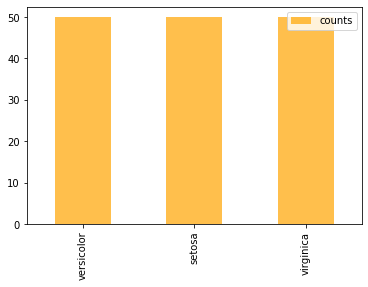

In [47]:
df4.plot.bar(color='orange', alpha=0.7)
plt.show()

#### 산점도 행렬:

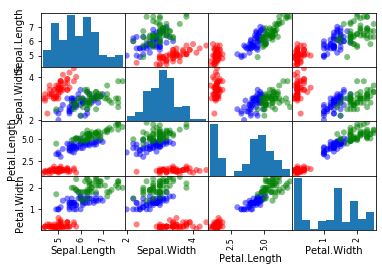

In [48]:
my_cols_dict = {'setosa':'red', 'virginica':'green', 'versicolor':'blue'}
my_cols = df0['Species'].apply(lambda x: my_cols_dict[x])
pd.plotting.scatter_matrix(df0, c=my_cols, marker='o', alpha=0.5)
plt.show()